<a href="https://colab.research.google.com/github/DambaniDeborah/DambaniDeborah/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset
nSubj <- 40
doses <- c(0, 10, 30, 100)
times <- seq(0, 9, 3)
dat <- expand.grid(Subject = 1:nSubj,
Month = times)
dat <- as.data.frame(unclass(dat))
dat$Dose <- doses[as.numeric(dat$Subject) %% length(doses) + 1]
dat$Exposure <- dat$Dose * exp(rnorm(nrow(dat), 0, 0.3))
noise <- rep(rnorm(nSubj, 0, 0.2), length(doses)) + rnorm(nrow(dat
), 0, 0.2)
emax <- c(0, 50, 100, 100)[match(dat$Month, times)]
dat$Response <- with(dat, 10 + emax * Exposure / (Exposure + 25))* exp(noise)
dat$Response <- pmin(dat$Response, 100)
dat$Dose2 <- factor(paste(dat$Dose, "mg"))
dat$Dose2 <- factor(dat$Dose2, levels = levels(dat$Dose2)[c(1, 2,
4, 3)])
dat$Sex <- rep(sample(c("M", "F"), nSubj, replace = TRUE), length(
times))

In [ ]:
#Question 1: Plot Response versus Exposure, conditional on Month, using Dose as the groups
#variable. Set the theme so that placebo is represented by blue circles and active doses
#are represented by red crosses that increase in size as the dose level increases.

In [ ]:
head(dat)

,Subject,Month,Dose,Exposure,Response,Dose2,Sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,1,0,10,10.24484,5.750683,10 mg,F
2,2,0,30,30.14740,12.255198,30 mg,F
3,3,0,100,83.22877,13.278979,100 mg,F
4,4,0,0,0.00000,14.406844,0 mg,M
5,5,0,10,11.57465,8.662402,10 mg,F
6,6,0,30,40.15694,7.391468,30 mg,F


In [ ]:
str(dat)

'data.frame':	160 obs. of  7 variables:
 $ Subject : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Dose    : num  10 30 100 0 10 30 100 0 10 30 ...
 $ Exposure: num  10.2 30.1 83.2 0 11.6 ...
 $ Response: num  5.75 12.26 13.28 14.41 8.66 ...
 $ Dose2   : Factor w/ 4 levels "0 mg","10 mg",..: 2 3 4 1 2 3 4 1 2 3 ...
 $ Sex     : chr  "F" "F" "F" "M" ...


In [ ]:
summary(dat)

    Subject          Month           Dose          Exposure      
 Min.   : 1.00   Min.   :0.00   Min.   :  0.0   Min.   :  0.000  
 1st Qu.:10.75   1st Qu.:2.25   1st Qu.:  7.5   1st Qu.:  3.133  
 Median :20.50   Median :4.50   Median : 20.0   Median : 18.269  
 Mean   :20.50   Mean   :4.50   Mean   : 35.0   Mean   : 36.502  
 3rd Qu.:30.25   3rd Qu.:6.75   3rd Qu.: 47.5   3rd Qu.: 54.376  
 Max.   :40.00   Max.   :9.00   Max.   :100.0   Max.   :185.005  
    Response          Dose2        Sex           
 Min.   :  5.129   0 mg  :40   Length:160        
 1st Qu.: 11.426   10 mg :40   Class :character  
 Median : 21.786   30 mg :40   Mode  :character  
 Mean   : 37.395   100 mg:40                     
 3rd Qu.: 56.617                                 
 Max.   :100.000                                 

In [ ]:
dat$Dose[dat$Dose==0]<- 'Placebo'

In [ ]:
levels(dat$Dose2)<- c('Placebo', '10 mg', '30 mg', '100mg')

In [ ]:
levels(dat$Dose2)

[1] "Placebo" "10 mg"   "30 mg"   "100mg"

In [ ]:
head(dat)

,Subject,Month,Dose,Exposure,Response,Dose2,Sex
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,1,0,10,10.24484,5.750683,10 mg,F
2,2,0,30,30.14740,12.255198,30 mg,F
3,3,0,100,83.22877,13.278979,100mg,F
4,4,0,Placebo,0.00000,14.406844,Placebo,M
5,5,0,10,11.57465,8.662402,10 mg,F
6,6,0,30,40.15694,7.391468,30 mg,F


In [ ]:
str(dat$Dose2)

 chr [1:160] "10 mg" "30 mg" "100 mg" NA "10 mg" "30 mg" "100 mg" NA ...


In [ ]:
library(lattice)

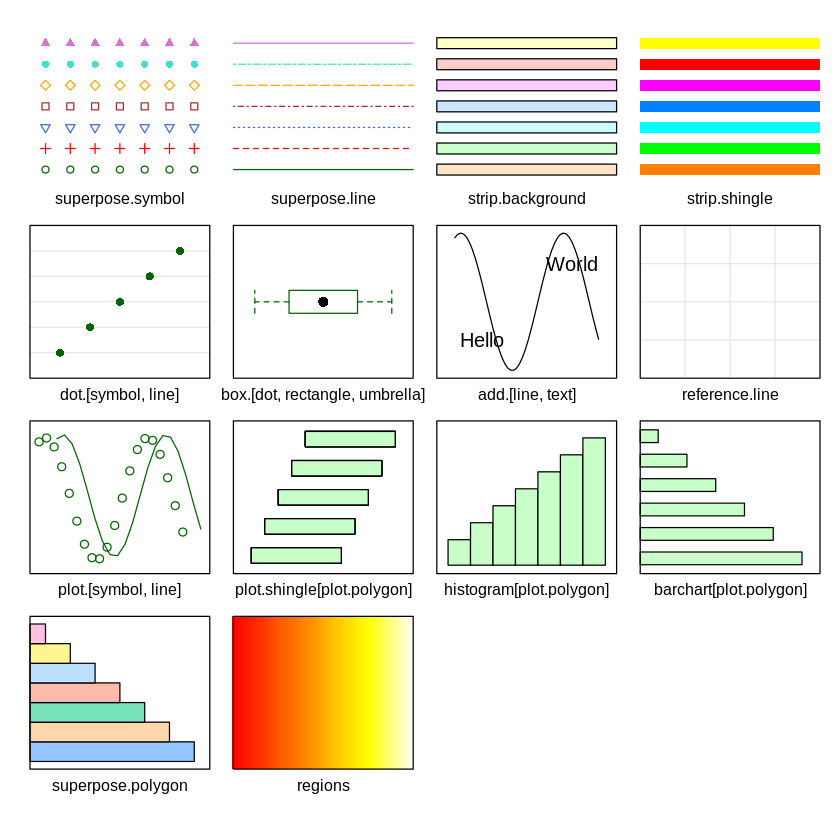

In [57]:
show.settings()

In [81]:
#set default first just in case you choose to return to it
defaulttheme<- trellis.par.get()

In [97]:
trellis.par.get('superpose.symbol')

$alpha
[1] 1 1 1 1 1 1 1

$cex
[1] 0.7 0.7 0.7 0.7 0.7 0.7 0.7

$col
[1] "darkgreen" "red"       "royalblue" "brown"     "orange"    "turquoise"
[7] "orchid"   

$fill
[1] "#CCFFFF" "#FFCCFF" "#CCFFCC" "#FFE5CC" "#CCE6FF" "#FFFFCC" "#FFCCCC"

$font
[1] 1 1 1 1 1 1 1

$pch
[1]  1  3  6  0  5 16 17

In [98]:
#make your alterations
trellis.par.set(superpose.symbol= list(pch= c(1,3,3,3), col= c('blue', 'red','red', 'red'),
cex= seq(0.7,2,0.2)))

In [99]:
#confirm 1
trellis.par.get('superpose.symbol')

$alpha
[1] 1 1 1 1 1 1 1

$cex
[1] 0.7 0.9 1.1 1.3 1.5 1.7 1.9

$col
[1] "blue" "red"  "red"  "red" 

$fill
[1] "#CCFFFF" "#FFCCFF" "#CCFFCC" "#FFE5CC" "#CCE6FF" "#FFFFCC" "#FFCCCC"

$font
[1] 1 1 1 1 1 1 1

$pch
[1] 1 3 3 3

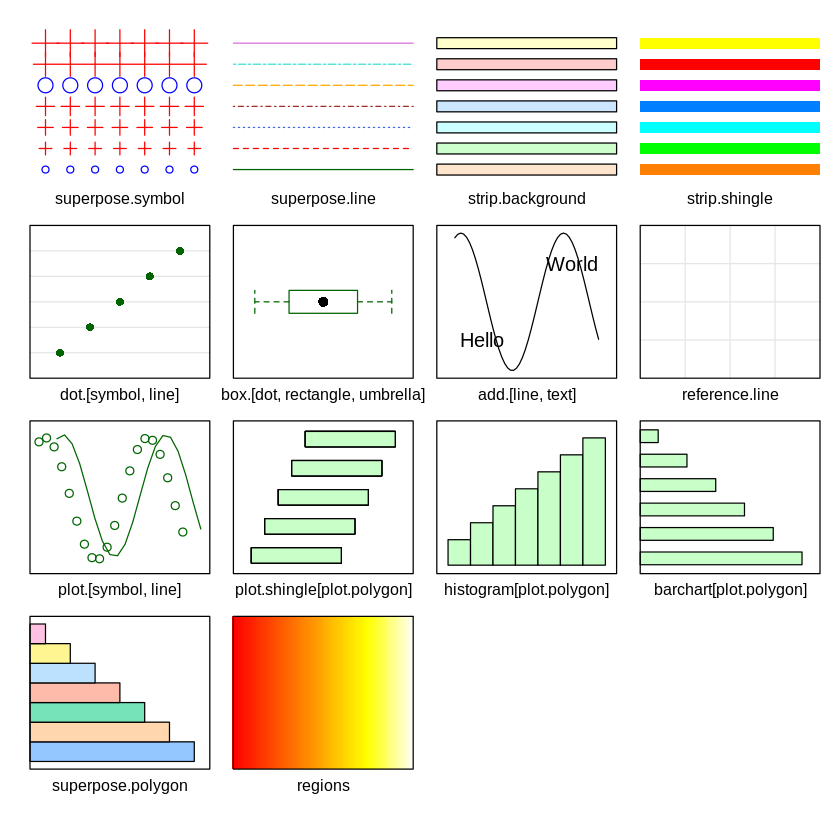

In [63]:
#confirm 2
show.settings()

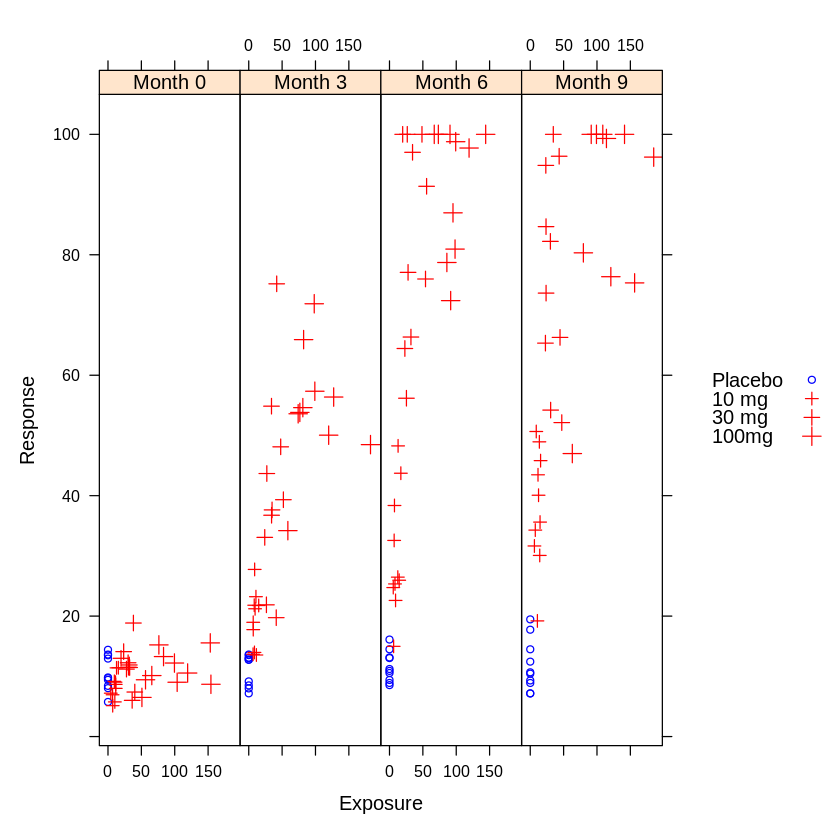

In [64]:
#Question 1: Plot Response versus Exposure, conditional on Month, using Dose as the groups
#variable. Set the theme so that placebo is represented by blue circles and active doses
#are represented by red crosses that increase in size as the dose level increases.

xyplot(data=dat, Response~Exposure|paste('Month', Month), groups= Dose2,layout= c(4,1), auto.key= T)

In [84]:
#return to default
trellis.par.set(defaulttheme)

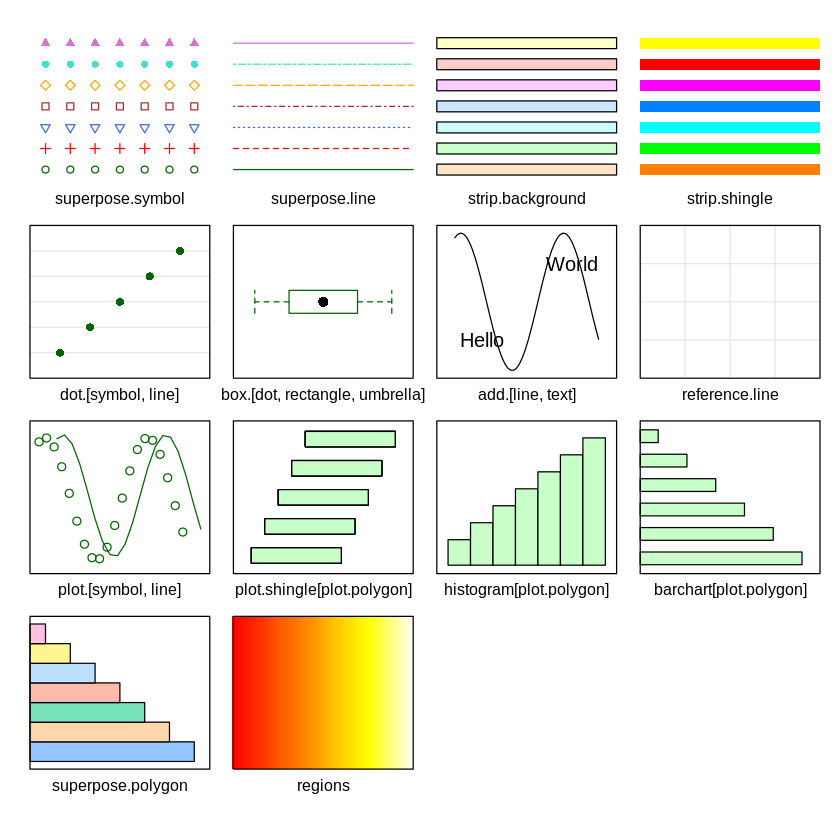

In [85]:
show.settings()

In [ ]:
#Question 2: Plot Response versus Month, conditional on Dose. Use thin grey lines to con￾nect data points from the same patient. Add a thick black line that connects the mean
#responses for each month.

In [86]:
summary(dat)

    Subject          Month          Dose              Exposure      
 Min.   : 1.00   Min.   :0.00   Length:160         Min.   :  0.000  
 1st Qu.:10.75   1st Qu.:2.25   Class :character   1st Qu.:  3.133  
 Median :20.50   Median :4.50   Mode  :character   Median : 18.269  
 Mean   :20.50   Mean   :4.50                      Mean   : 36.502  
 3rd Qu.:30.25   3rd Qu.:6.75                      3rd Qu.: 54.376  
 Max.   :40.00   Max.   :9.00                      Max.   :185.005  
    Response           Dose2        Sex           
 Min.   :  5.129   Placebo:40   Length:160        
 1st Qu.: 11.426   10 mg  :40   Class :character  
 Median : 21.786   30 mg  :40   Mode  :character  
 Mean   : 37.395   100mg  :40                     
 3rd Qu.: 56.617                                  
 Max.   :100.000                                  

In [87]:
str(dat)

'data.frame':	160 obs. of  7 variables:
 $ Subject : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Dose    : chr  "10" "30" "100" "Placebo" ...
 $ Exposure: num  10.2 30.1 83.2 0 11.6 ...
 $ Response: num  5.75 12.26 13.28 14.41 8.66 ...
 $ Dose2   : Factor w/ 4 levels "Placebo","10 mg",..: 2 3 4 1 2 3 4 1 2 3 ...
 $ Sex     : chr  "F" "F" "F" "M" ...


In [103]:
dat$Subject<- as.factor(dat$Subject)
dat$Month<- as.factor(dat$Month)

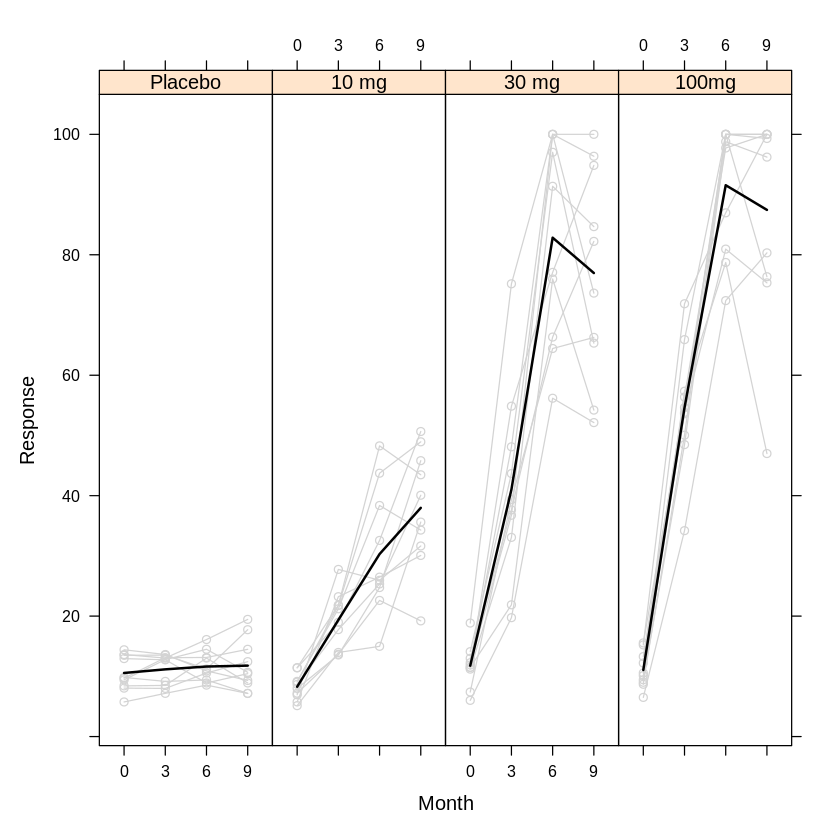

In [165]:
xyplot(data=dat, Response~Month|Dose2, groups= Subject,layout= c(4,1), panel= function(x, y, ...){
  panel.superpose(x, y, ...)
  mn<- tapply(y, x, mean)
  ux<- unique(x)
  panel.xyplot(ux, mn, type= 'l', col= 'black',lwd= 2)
}, panel.groups= function(x, y, ...){
  panel.xyplot(x, y, type= 'b', col= 'lightgrey')
})

In [105]:
#using ggplot2 to replicate the above output
library(ggplot2)

In [163]:
#Response against Month conditional on Dose
Base<- ggplot(data= dat, aes(x= Month, y= Response)) + facet_grid(.~Dose2)

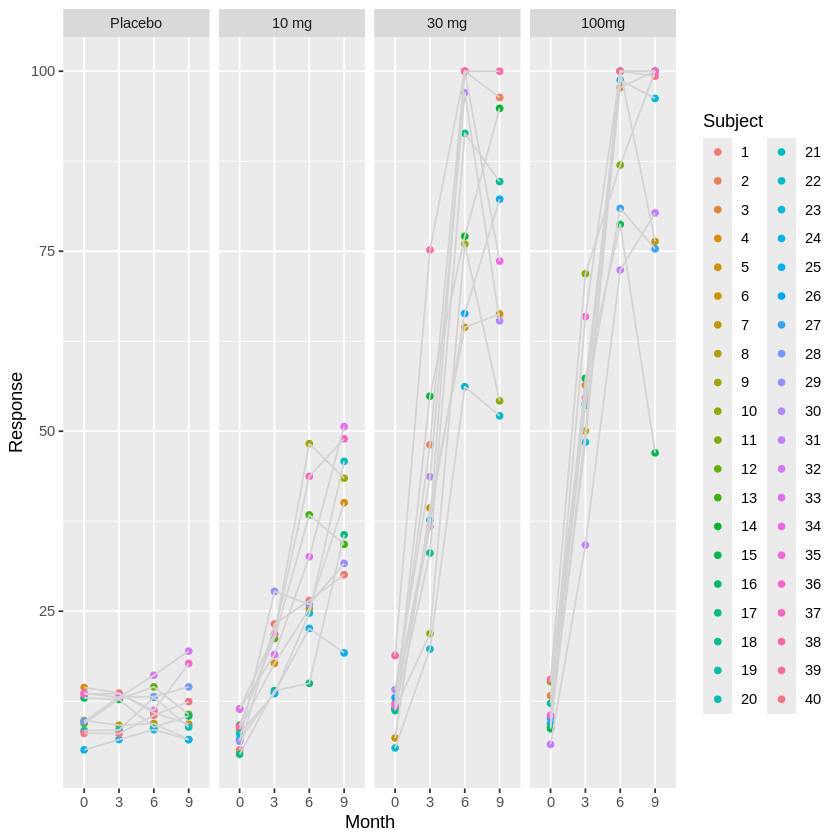

In [164]:
#con￾nect data points from the same patient/subject
plot1<-Base+ geom_point(aes(colour= Subject))+ geom_line(aes(group= Subject), col= 'lightgrey')
plot1

In [144]:
#Add a thick black line that connects the mean responses for each month.
#calculate mean response for each month and dose
mean_response <- aggregate(Response ~ Month*Dose2, data = dat, FUN = mean)
mean_response

Month,Dose2,Response
<fct>,<fct>,<dbl>
0,Placebo,10.55867
3,Placebo,11.15940
6,Placebo,11.62605
9,Placebo,11.77721
0,10 mg,8.27083
3,10 mg,19.36622
6,10 mg,30.30308
9,10 mg,37.97564
0,30 mg,11.76472


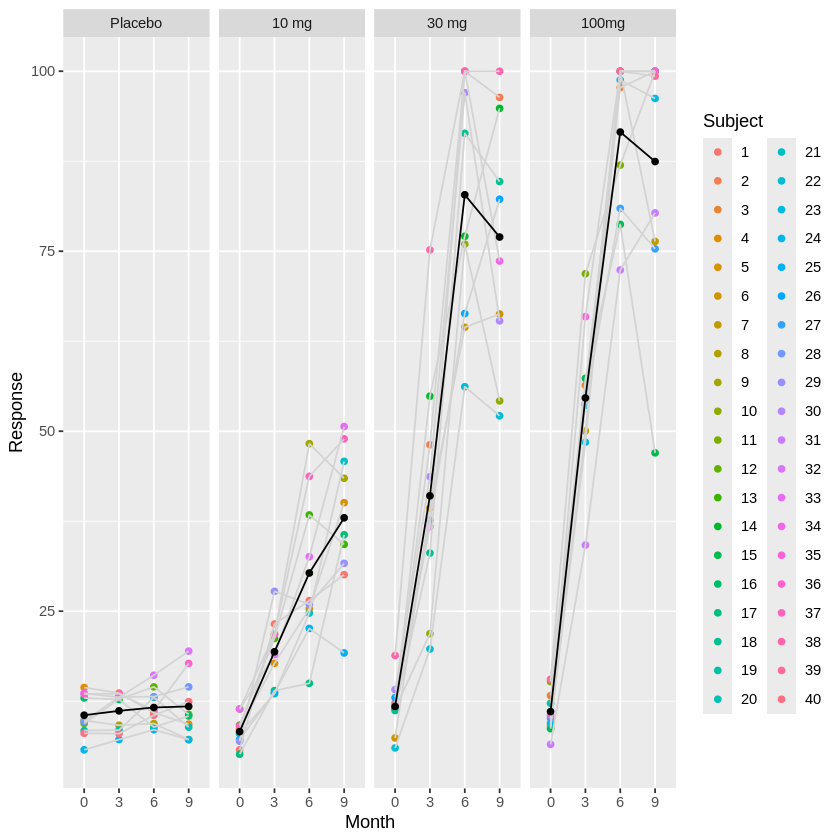

In [162]:
#add mean response point and line that connects them
plot2<- plot1+ geom_point(data = mean_response, aes(x = Month, y = Response))+ geom_line(data= mean_response, aes(group= Dose2))
plot2